#   3장 실습 - 화소 점 처리(1)
#### 화소의 값이나 위치를 바탕으로 단일 화소 값을 변경
#### 산술연산, 논리연산, 반전, 광도 보정, 히스토그램 평활화, 명암 대비 스트레칭 등

In [2]:
### packages
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

## 디지털 영상의 산술연산
##### 영상의 각 화소 값에서 임의의 상수 값으로 덧셈, 뺄셈, 곱셈, 나눗셈을 수행
##### 연산의 결과 값이 최소값보다 작으면 최소값으로, 최대값보다 크면 최대값을 적용
#####  8비트 영상: 음수는 0으로 설정하고, 255보다 큰 값은 255로 설정

In [3]:
### 출력 영상 크기
plt.rcParams ['figure.figsize'] = [16,9]
### 한글 표시
plt.rcParams['font.family'] = 'Gulim'

In [4]:
### 영상 읽기
img_raw = cv2.imread(r"C:\Users\kr937\Desktop\2023\2023\Image processing\lena.png")
### Grayscale
img_gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)
img_gray.shape

(512, 512)

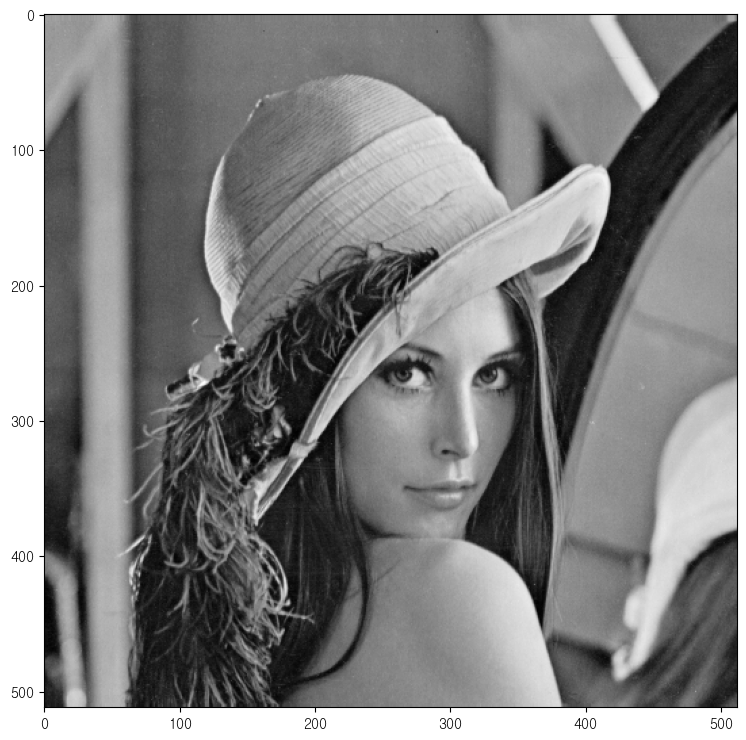

In [5]:
### 영상 출력 - grayscale
plt.imshow(img_gray, 'gray')
plt.show()

### 덧셈
영상의 밝기 증가


In [6]:
### 덧셈
img_1 = cv2.add(img_gray, 50)
img_2 = cv2.add(img_gray, 100)
img_3 = cv2.add(img_gray, 200)

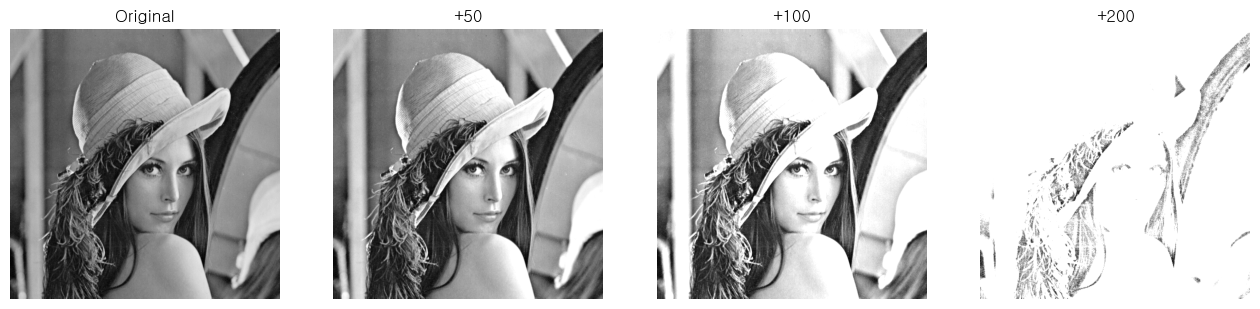

In [7]:
### 영상 출력
titles = ["Original", "+50", "+100", "+200"]
images = [img_gray, img_1, img_2, img_3]
for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### ■ 뺄셈
영상의 밝기 감소

In [8]:

### 뺄셈
img_1 = cv2.subtract(img_gray, 50)  # cv2.add(img_gray, -50)
img_2 = cv2.subtract(img_gray, 100)
img_3 = cv2.subtract(img_gray, 200)

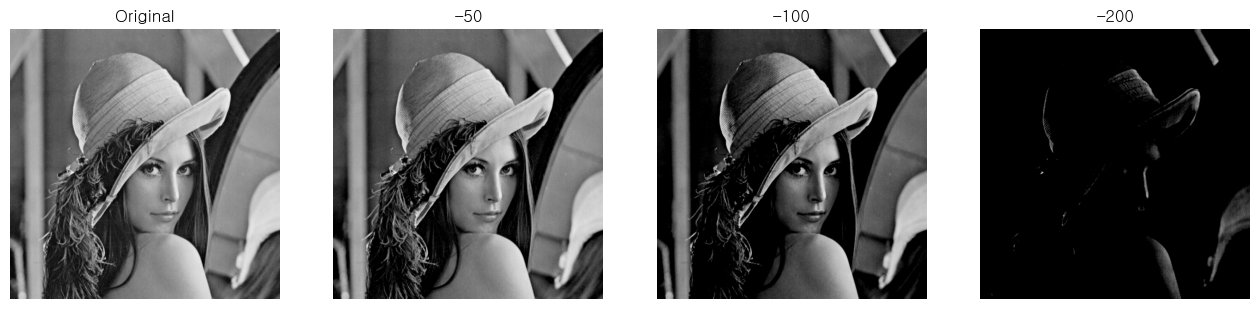

In [9]:

### 영상 출력
titles = ["Original", "-50", "-100", "-200"]
images = [img_gray, img_1, img_2, img_3]
for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### ■ 곱셈
영상의 밝기 차이 증가

In [10]:
### 곱셈
img_1 = cv2.multiply(img_gray, 1.3)
img_2 = cv2.multiply(img_gray, 1.5)
img_3 = cv2.multiply(img_gray, 1.7)

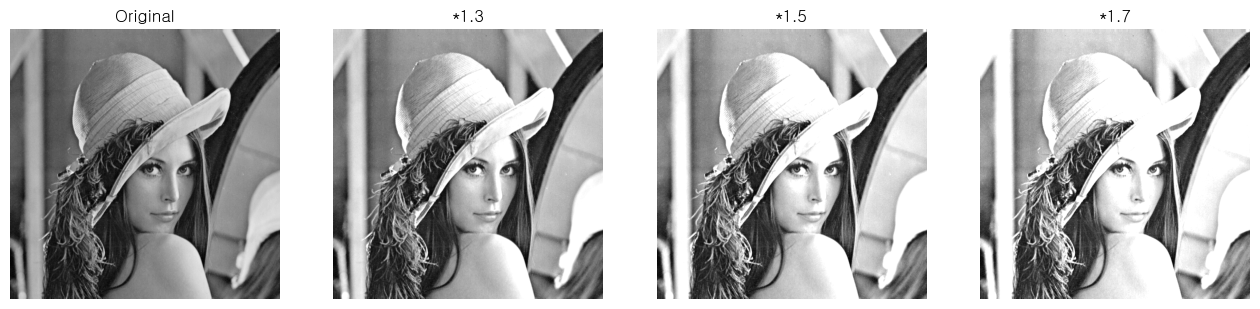

In [11]:
### 영상 출력
titles = ["Original", "*1.3", "*1.5", "*1.7"]
images = [img_gray, img_1, img_2, img_3]
for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### 나눗셈
영상의 밝기 차이 감소

In [12]:
### 나눗셈
img_1 = cv2.divide(img_gray, 1.3)
img_2 = cv2.divide(img_gray, 1.5)
img_3 = cv2.divide(img_gray, 1.7)

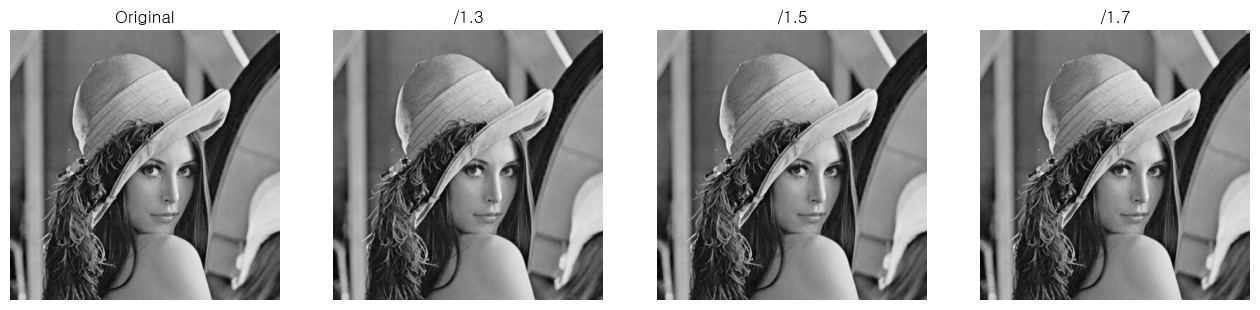

In [13]:
### 영상 출력
titles = ["Original", "/1.3", "/1.5", "/1.7"]
images = [img_gray, img_1, img_2, img_3]
for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### 밝기와 대비 조정(brightness and contrast adjustments)
#### 연산: new_image(x,y) = image(x,y) + β
#### α: 대비(contrast), : 밝기(brightness)

In [14]:
### 밝게 - alpha = 1, beta = 32
img_1 = cv2.convertScaleAbs(img_gray, alpha = 1, beta = 50)
### 어둡게 - alpha = 1, beta = -32
img_2 = cv2.convertScaleAbs(img_gray, alpha = 1, beta = -50)
### 반전 - alpha = -1, beta = 255
img_3 = cv2.convertScaleAbs(img_gray, alpha = -1, beta = 255)

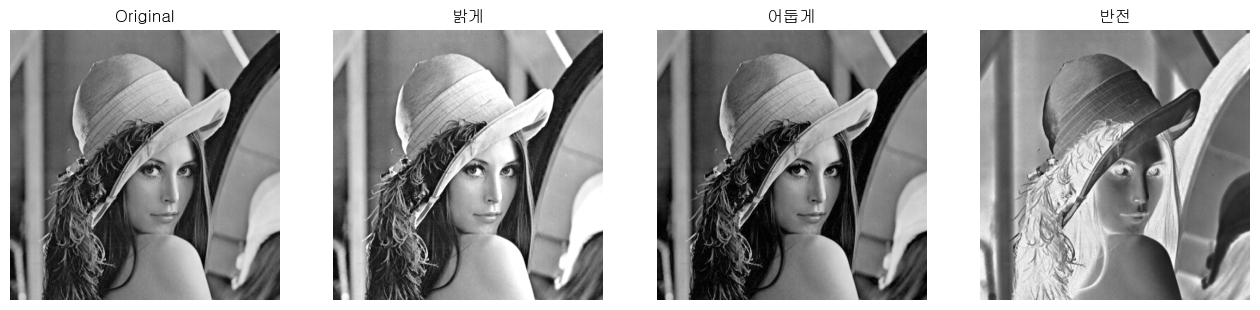

In [15]:
### 영상 출력
titles = ["Original", "밝게", "어둡게", "반전"]
images = [img_gray, img_1, img_2, img_3]
for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.axis('off')
plt.show()


### 디지털 영상의 논리연산
● Elementwise bit operations - Numpy

In [16]:
### dtype = uint8
a = np.array(110, dtype = 'uint8')
b = np.array(200, dtype = 'uint8')
print('{0:08b}'.format(a))
print('{0:08b}'.format(b))

01101110
11001000


In [17]:
### AND
c = np.bitwise_and(a, b)

In [18]:
print('{0:08b}'.format(c))
print(c)

01001000
72


In [19]:
### OR
c = np.bitwise_or(a, b)
print('{0:08b}'.format(c))
print(c)

11101110
238


In [20]:
### XOR
c = np.bitwise_xor(a, b)
print('{0:08b}'.format(c))
print(c)

10100110
166


In [21]:
### NOT
c = np.invert(a)
print('{0:08b}'.format(c))
print(c)

10010001
145


In [22]:
### 영상 읽기
img_gray = cv2.imread(r"C:\Users\kr937\Desktop\2023\2023\Image processing\lena.png", 0)
img_gray.shape

(512, 512)

In [23]:
### Mask
img_mask = np.zeros((512,512), dtype = 'uint8')
img_mask[128:385, 128:385] = 255

In [24]:
### 논리연산
img_and = cv2.bitwise_and(img_gray, img_mask)
img_or = cv2.bitwise_or(img_gray, img_mask)
img_xor = cv2.bitwise_xor(img_gray, img_mask)
img_not = cv2.bitwise_not(img_gray)

<function matplotlib.pyplot.show(close=None, block=None)>

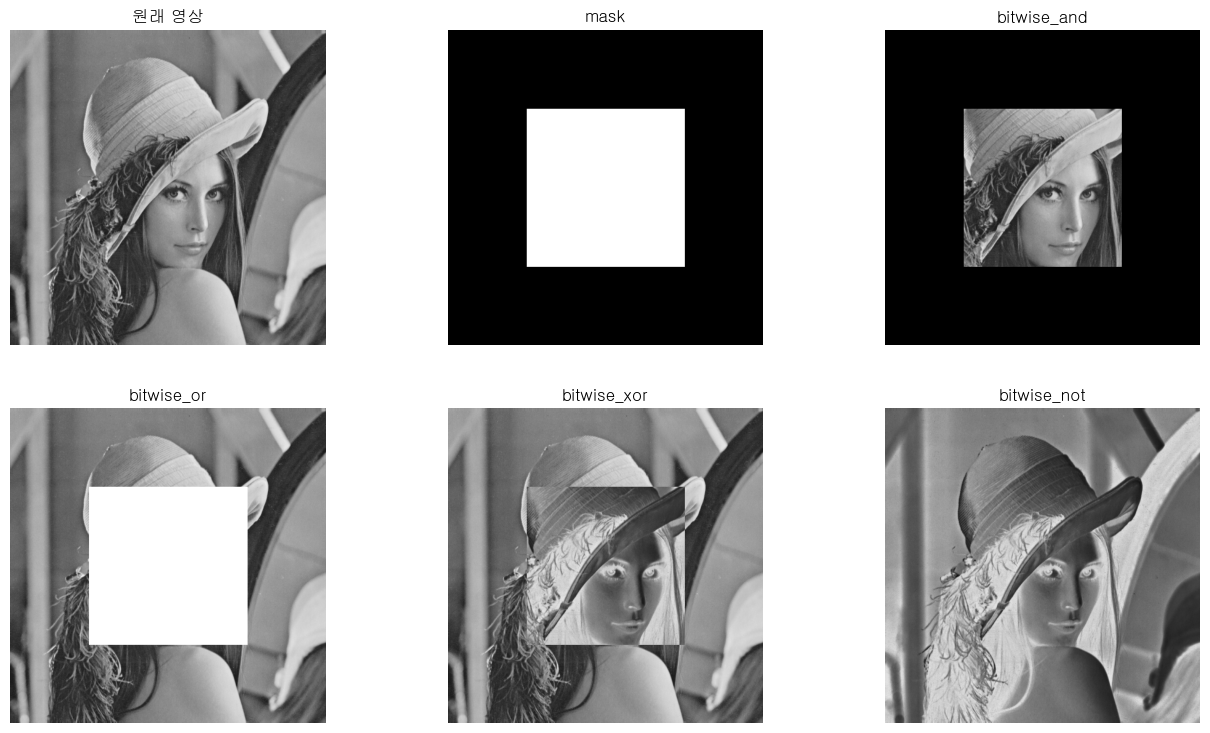

In [26]:
### 영상 출력
titles = ['원래 영상', 'mask', 'bitwise_and', 'bitwise_or', 'bitwise_xor', 'bitwise_not']
images = [img_gray, img_mask, img_and, img_or, img_xor, img_not]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show

### Color image

In [27]:
### 영상 읽기
img_raw = cv2.imread(r"C:\Users\kr937\Desktop\2023\2023\Image processing\lena.png")
img_raw.shape

(512, 512, 3)

In [35]:
### Mask
img_mask = np.zeros((512, 512, 3), dtype='uint8')
img_mask[128:385, 128:385, : ] = 255

In [36]:
### 논리연산
img_and = cv2.bitwise_and(img_raw, img_mask)
img_or = cv2.bitwise_or(img_raw, img_mask)
img_xor = cv2.bitwise_xor(img_raw, img_mask)
img_not = cv2.bitwise_not(img_raw)

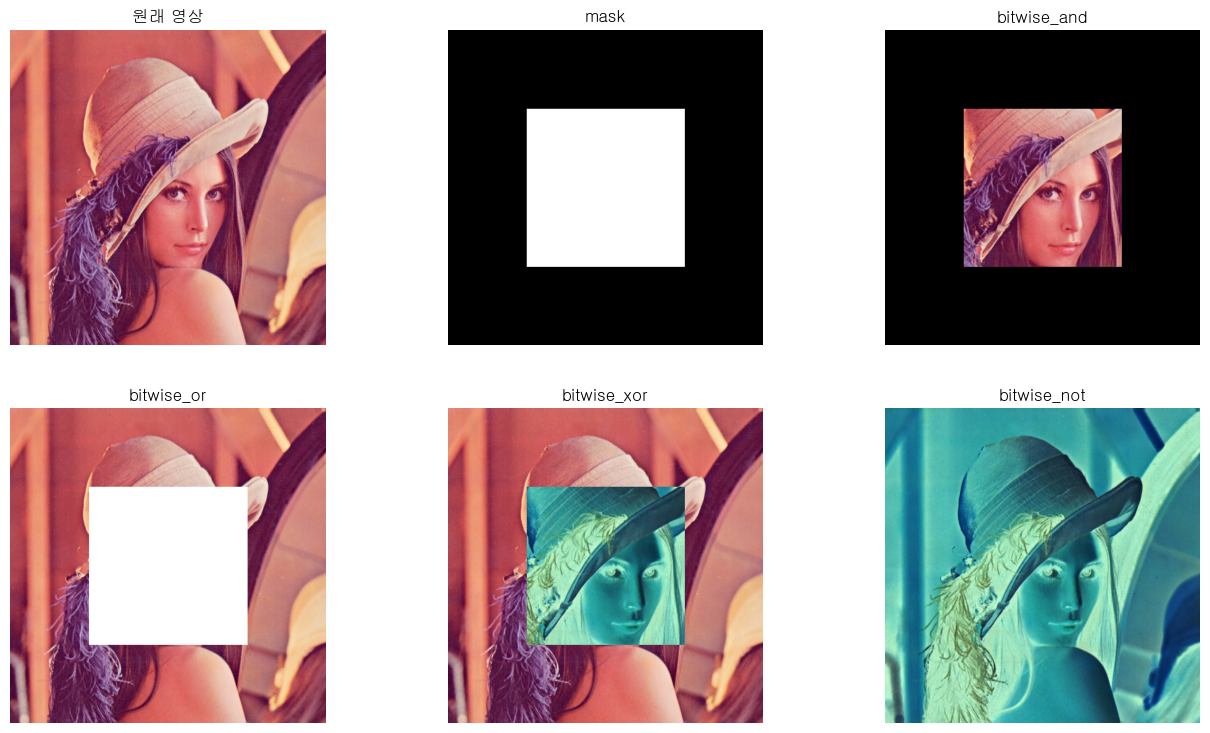

In [38]:
### 영상 출력
titles = ['원래 영상', 'mask', 'bitwise_and', 'bitwise_or', 'bitwise_xor', 'bitwise_not']
images = [img_raw, img_mask, img_and, img_or, img_xor, img_not]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()